In [1]:
import zipfile
import os

In [2]:
!wget --no-check-certificate \
    "https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_data.zip" \
    -O "/tmp/brain_tumor_data.zip"

zip_ref = zipfile.ZipFile('/tmp/brain_tumor_data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-11-19 16:03:08--  https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_data.zip [following]
--2023-11-19 16:03:08--  https://raw.githubusercontent.com/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91021706 (87M) [application/zip]
Saving to: ‘/tmp/brain_tumor_data.zip’

/tmp/brain_tumor_da 100%[===================>]  86.80M   246MB/s    in 0.4s    

2023-11-19 16:

In [3]:
carpeta_training = "/tmp/brain_tumor_data/Training"
carpeta_testing = "/tmp/brain_tumor_data/Testing"

In [34]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
nb_classes = 4
nb_epochs = 10
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3
img_size = 224

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(carpeta_training, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(carpeta_testing, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [47]:
train_generator.labels.shape

(2870,)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
batch = train_generator.next()
nueva_imagen = batch[0].astype('float32')
batch[1]


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

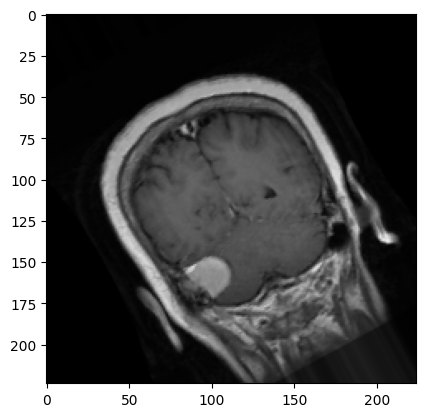

In [49]:
plt.imshow(nueva_imagen[3])

In [52]:
class_indices = train_generator.class_indices

# Reverse the mapping to get label names
label_names = {v: k for k, v in class_indices.items()}
class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}